In [1]:
%cd ..

/home/jo3/p/features2image_diffusion


/home/jo3/p/features2image_diffusion/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning:

using dhist requires you to install the `pickleshare` library.



In [2]:
import argtoml
import jax
import matplotlib.pyplot as plt
import numpy as np
import torch

from pathlib import Path
from typing import Tuple

from jaxtyping import Float
from jo3mnist.vis import to_img
from torch.utils.data import DataLoader

from features2image_diffusion.__main__ import evaluate
from features2image_diffusion.data import load_mnist_with_features, loader_to_dataframe
from features2image_diffusion.unet import load_ddpm

np.set_printoptions(precision=3)

RUN_PATH = Path.cwd() / "run/7927ad448cfdb96d1e819f599d5ce8a200a3de67068866289c8cf1e0215ec398"
O = argtoml.parse_args(toml_path=[RUN_PATH / "config.toml"])
RUN = O["run"][0]
DEVICE = "cuda"

print("create the dataloader")
# TRAIN_LOADER, TEST_LOADER = load_mnist_with_features(
    # RUN["feature_dir"], O["mnist_dir"], RUN["batch_size"], shuffle=False
# )
print("convert the loader to a dataframe")
# TRAIN_SET = loader_to_dataframe(TRAIN_LOADER, img_dir="./res/mnist/img")

create the dataloader
convert the loader to a dataframe
Launching the widget server


(<Thread(http server, started 129623161571008)>,
 '<!doctype html>\n<html lang="en">\n  <head>\n    <script type="module">\n      import init, { COMPONENT } from "/pkg/features2image_diffusion_dioxus_widgets.js";\n      async function main() {\n        await init();\n        COMPONENT(document.getElementById("dioxus-component"));\n      }\n      main();\n    </script>\n<link rel="stylesheet" href="/pkg/style.css">\n  </head>\n  <body>\n    <div id="dioxus-component"ATTRIBUTES>DATA</div>\n  </body>\n</html>\n')

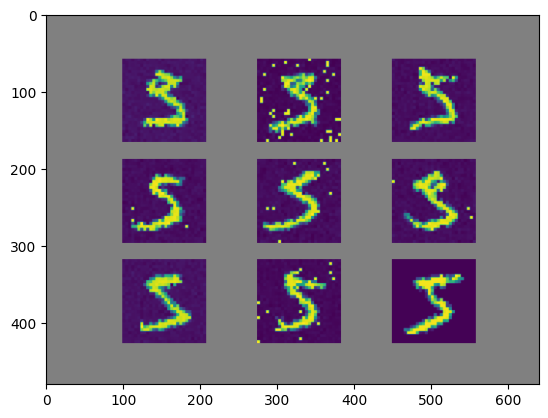

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 56616)
Traceback (most recent call last):
  File "/usr/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/jo3/p/features2image_diffusion/.venv/lib/python3.11/site-packages/dioxus_widget/__init__.py", line 226, in __init__
    super().__init__(*args, **kwargs)
  File "/home/jo3/p/features2image_diffusion/.venv/lib/python3.11/site-packages/dioxus_widget/__init__.py", line 206, in __init__
    super().__init__(*args, **kwargs)
  File "/usr/lib/python3.11/http/server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "/usr/lib/p

In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

RUN_ID = "4409b6282a7d05f0b08880228d6d6564011fa40be412073ff05aff8bf2dc49fa"

def get_img(run_id, data_id, feature_id, mod_id):
    
    if mod_id == -1:
        path = Path.cwd() / "run" / RUN_ID / str(data_id) / "unedited-images.png"
    else:
        path = Path.cwd() / "run" / RUN_ID / str(data_id) / str(feature_id) / f"{mod_id}-images.png"

    return mpimg.imread(path)
        
plt.imshow(get_img(RUN_ID, 0, 0, -1))
plt.show()

In [3]:
import dioxus_widget
print("Launching the widget server")
dioxus_widget.init(
    "pkg/features2image_diffusion_dioxus_widgets.js",
    style_path="pkg/style.css",
    verbose=False
)

Launching the widget server


(<Thread(http server, started 128802332083904)>,
 '<!doctype html>\n<html lang="en">\n  <head>\n    <script type="module">\n      import init, { COMPONENT } from "/pkg/features2image_diffusion_dioxus_widgets.js";\n      async function main() {\n        await init();\n        COMPONENT(document.getElementById("dioxus-component"));\n      }\n      main();\n    </script>\n<link rel="stylesheet" href="/pkg/style.css">\n  </head>\n  <body>\n    <div id="dioxus-component"ATTRIBUTES>DATA</div>\n  </body>\n</html>\n')

In [4]:
RUN_ID = "4409b6282a7d05f0b08880228d6d6564011fa40be412073ff05aff8bf2dc49fa"
dioxus_widget.debug("feature_images", "", {"run": RUN_ID}, width="60%", height="2000px")

Button(description='Stop', style=ButtonStyle())

In [ ]:
dioxus_widget.clean()